In [ ]:
import pandas as pd

# Read the file with a different encoding, like 'latin-1'
df = pd.read_csv('Copper_Set.csv', encoding='latin-1')

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())



Original DataFrame:
                                     id   item_date quantity tons    customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139  30156308.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839  30202938.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949  30153963.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065  30349574.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262  30211560.0   

   country status item type  application  thickness   width  \
0     28.0    Won         W         10.0       2.00  1500.0   
1     25.0    Won         W         41.0       0.80  1210.0   
2     30.0    Won        WI         28.0       0.38   952.0   
3     32.0    Won         S         59.0       2.30  1317.0   
4     28.0    Won         W         10.0       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S4

<ipython-input-11-2428280ceb15>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set.csv', encoding='latin-1')


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df

# Numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Displaying the lists
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
['item_date', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'delivery date', 'selling_price']

Categorical Columns:
['id', 'quantity tons', 'status', 'item type', 'material_ref']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df

# Categorical columns to encode
categorical_columns_to_encode = ['id', 'quantity tons', 'status', 'item type', 'material_ref']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns_to_encode:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Display the updated DataFrame
print(df.head())


       id   item_date  quantity tons    customer  country  status  item type  \
0  167599  20210401.0         135668  30156308.0     28.0       7          5   
1   55577  20210401.0         163266  30202938.0     25.0       7          5   
2  159737  20210401.0         110073  30153963.0     30.0       7          6   
3  176555  20210401.0          49759  30349574.0     32.0       7          3   
4   55380  20210401.0         164459  30211560.0     28.0       7          5   

   application  thickness   width  material_ref  product_ref  delivery date  \
0         10.0       2.00  1500.0         10445   1670798778     20210701.0   
1         41.0       0.80  1210.0          1184   1668701718     20210401.0   
2         28.0       0.38   952.0         14749       628377     20210101.0   
3         59.0       2.30  1317.0         10719   1668701718     20210101.0   
4         10.0       4.00  2000.0          6976       640665     20210301.0   

   selling_price  
0         854.00  
1     

In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df

# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Replace missing values if any (example: replacing with mean for numerical columns)
df.fillna(df.mean(), inplace=True)  # Replace NaN values with mean of each column

# Verify if there are any missing values after filling
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Optional: Convert data types if needed (example: converting float columns to int if appropriate)
df['item_date'] = df['item_date'].astype(int)  # Example conversion from float to int

# Optional: Outlier detection and handling (example: removing rows with outliers)
# Define function to detect outliers using z-score
def detect_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return z_scores > threshold

# Apply outlier detection on numerical columns (adjust as per your need)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers = df[numerical_columns].apply(detect_outliers)

# Remove rows containing outliers
df = df[~outliers.any(axis=1)]

# Display cleaned and preprocessed DataFrame
print("\nCleaned and Preprocessed DataFrame:")
print(df.head())


Missing values before cleaning:
id                0
item_date         1
quantity tons     0
customer          1
country          28
status            0
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

Missing values after cleaning:
id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Cleaned and Preprocessed DataFrame:
       id  item_date  quantity tons    customer  country  status  item type  \
0  167599   20210401         135668  30156308.0     28.0       7          5   
1   55577   20210401         163266  30202938.0     25.0       7          5   
2  159737   20210401         110073  30153963.0     30.0       7          6   
3  176555  

<class 'pandas.core.frame.DataFrame'>
Index: 178525 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             178525 non-null  int64  
 1   item_date      178525 non-null  int64  
 2   quantity tons  178525 non-null  int64  
 3   customer       178525 non-null  float64
 4   country        178525 non-null  float64
 5   status         178525 non-null  int64  
 6   item type      178525 non-null  int64  
 7   application    178525 non-null  float64
 8   thickness      178525 non-null  float64
 9   width          178525 non-null  float64
 10  material_ref   178525 non-null  int64  
 11  product_ref    178525 non-null  int64  
 12  delivery date  178525 non-null  float64
 13  selling_price  178525 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 20.4 MB
None
                  id     item_date  quantity tons      customer  \
count  178525.000000  1.785250e+05  178525.000000  

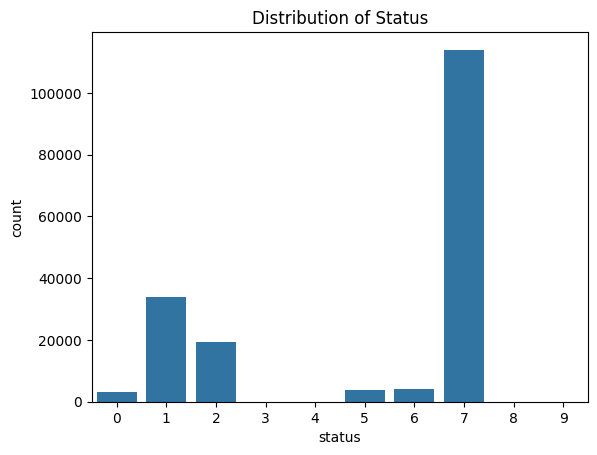

Correlation Matrix:
                      id  item_date  quantity tons  customer   country  \
id             1.000000   0.000873      -0.003624  0.003360 -0.000741   
item_date      0.000873   1.000000       0.005609  0.001086 -0.013648   
quantity tons -0.003624   0.005609       1.000000 -0.004669  0.019699   
customer       0.003360   0.001086      -0.004669  1.000000  0.089194   
country       -0.000741  -0.013648       0.019699  0.089194  1.000000   
status        -0.001059   0.050321       0.016851 -0.034434  0.095159   
item type     -0.003471   0.059750       0.027795 -0.087260  0.125295   
application   -0.000629  -0.004688      -0.018571  0.008360 -0.053870   
thickness      0.001478  -0.000204      -0.007686  0.091935 -0.033570   
width          0.002932   0.010945       0.012402  0.054218  0.051802   
material_ref   0.002651   0.015227      -0.001107  0.014222  0.133478   
product_ref    0.002174   0.042006       0.000376 -0.033350 -0.146538   
delivery date -0.001704   0.59

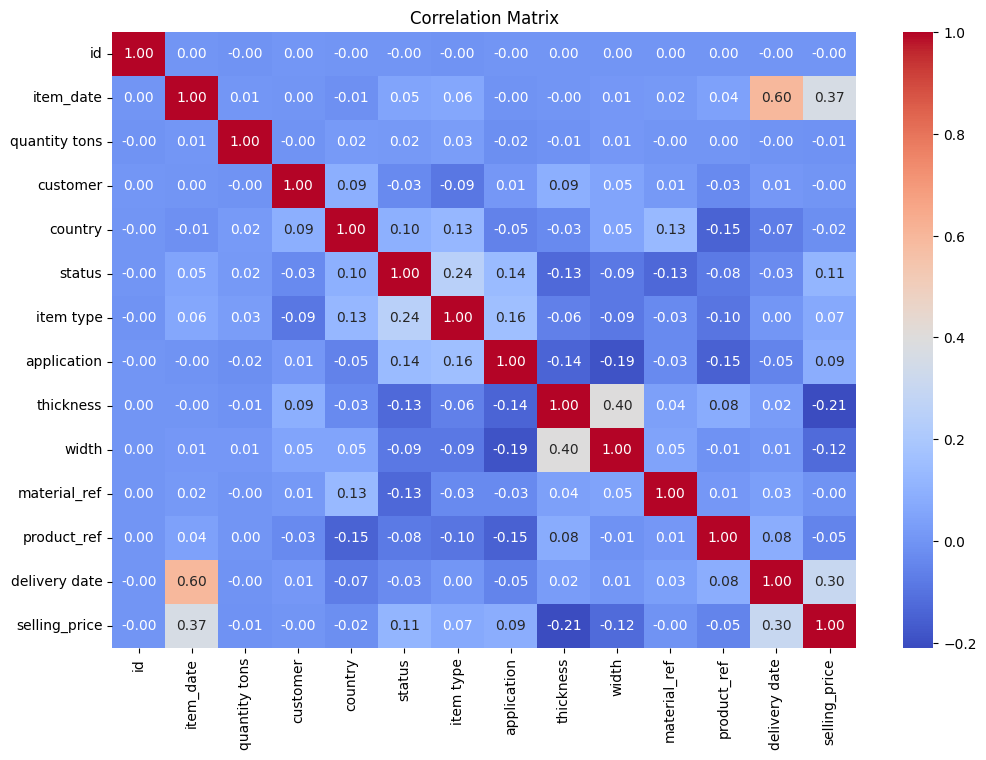

Correlation with Status:
 status           1.000000
item type        0.244258
application      0.137022
selling_price    0.113980
country          0.095159
item_date        0.050321
quantity tons    0.016851
id              -0.001059
delivery date   -0.026239
customer        -0.034434
product_ref     -0.077391
width           -0.086701
thickness       -0.128584
material_ref    -0.133289
Name: status, dtype: float64


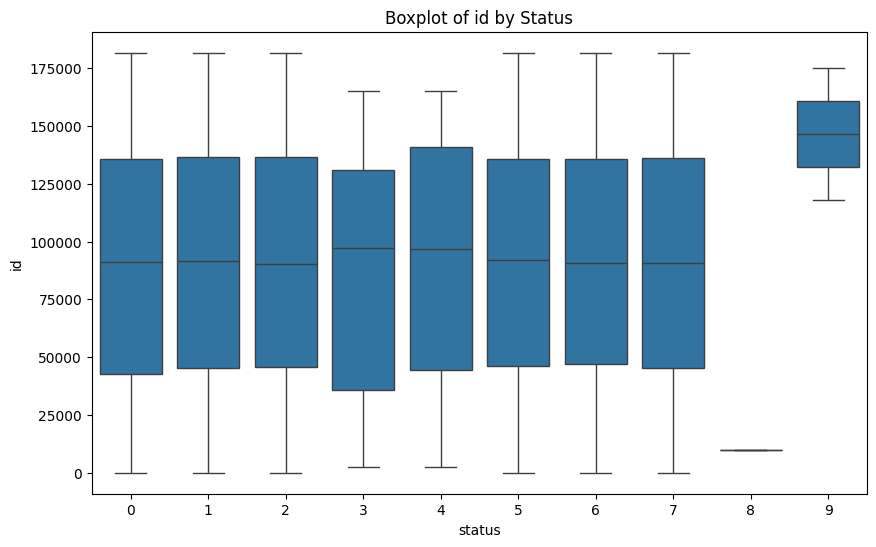

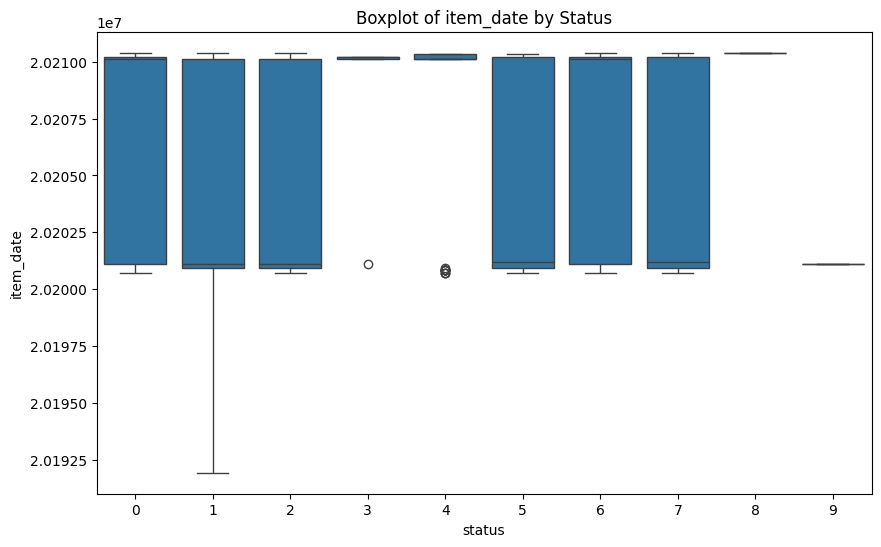

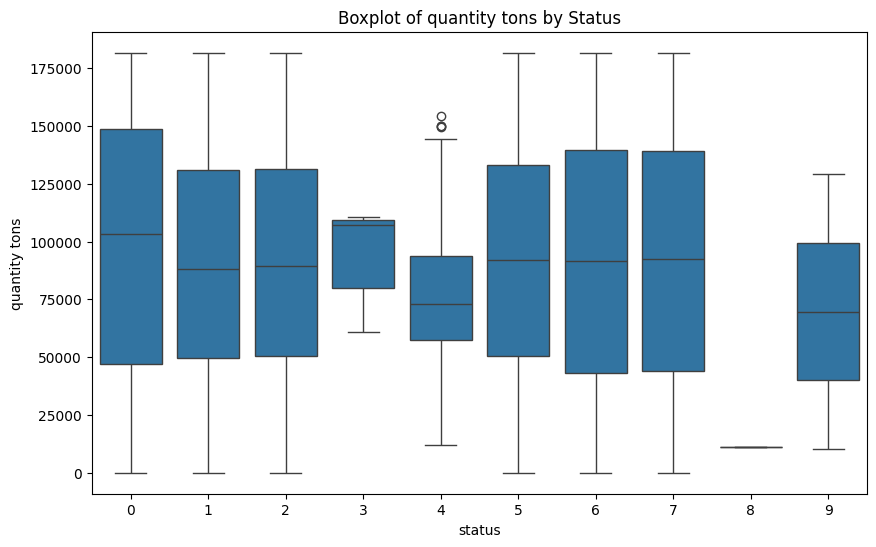

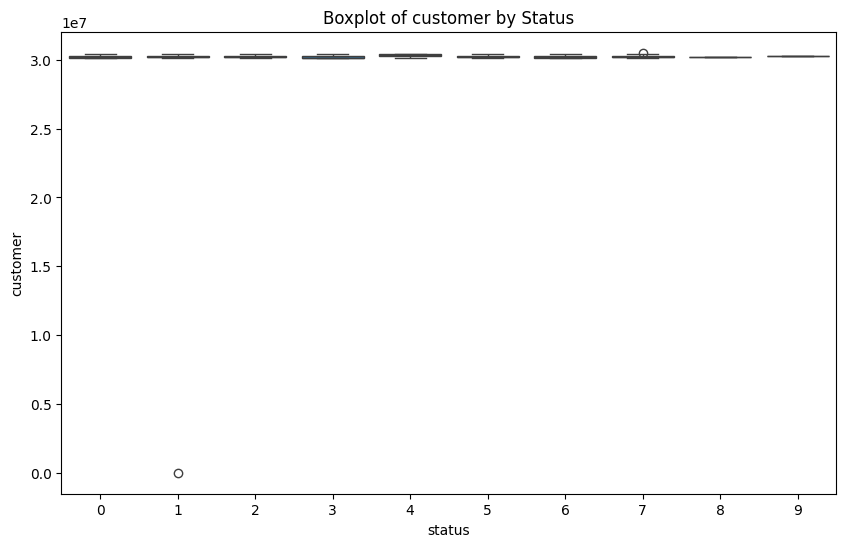

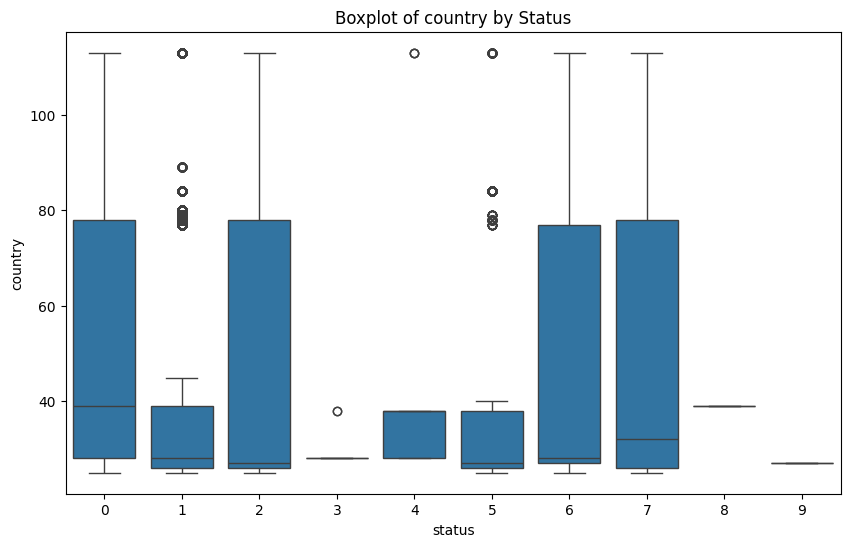

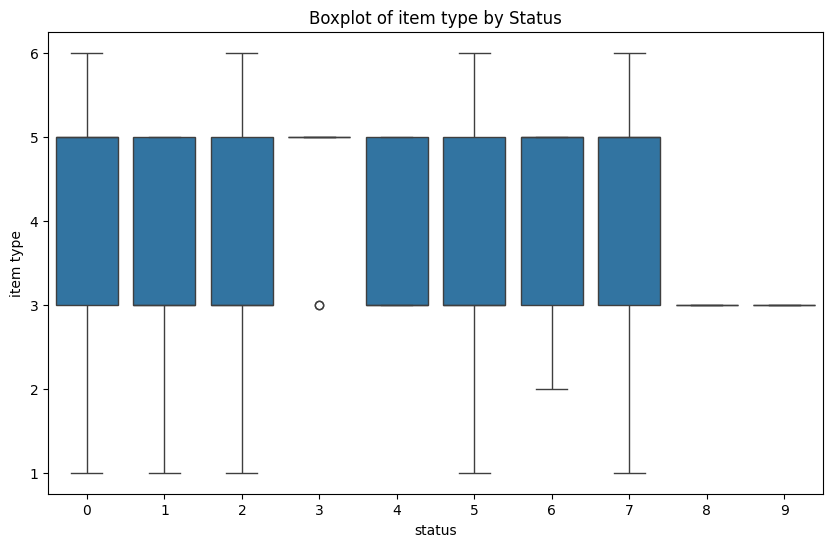

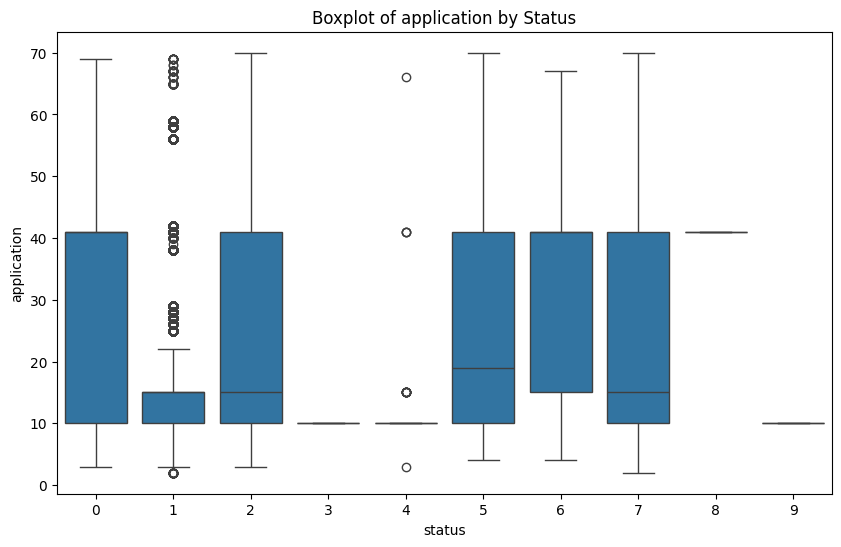

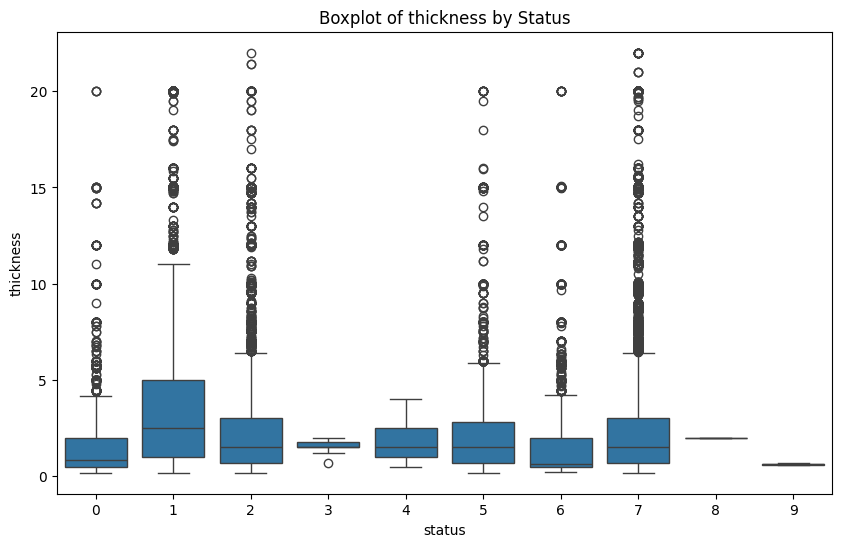

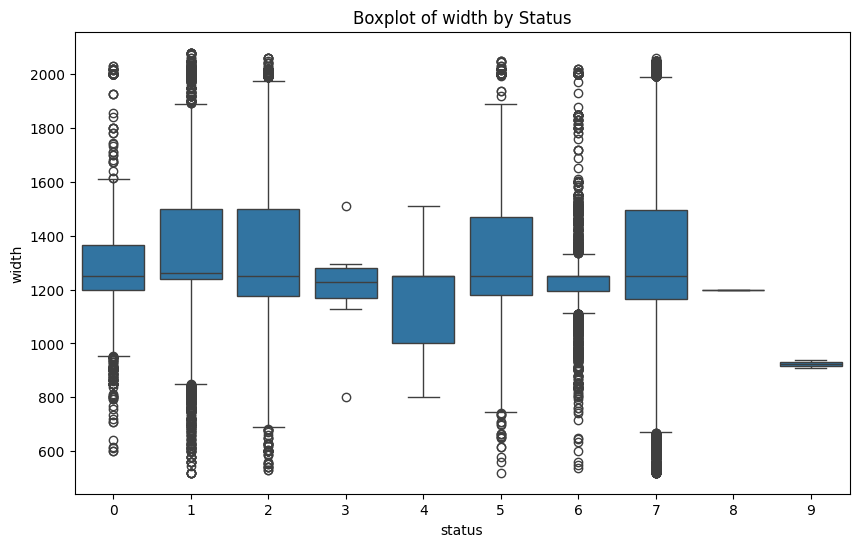

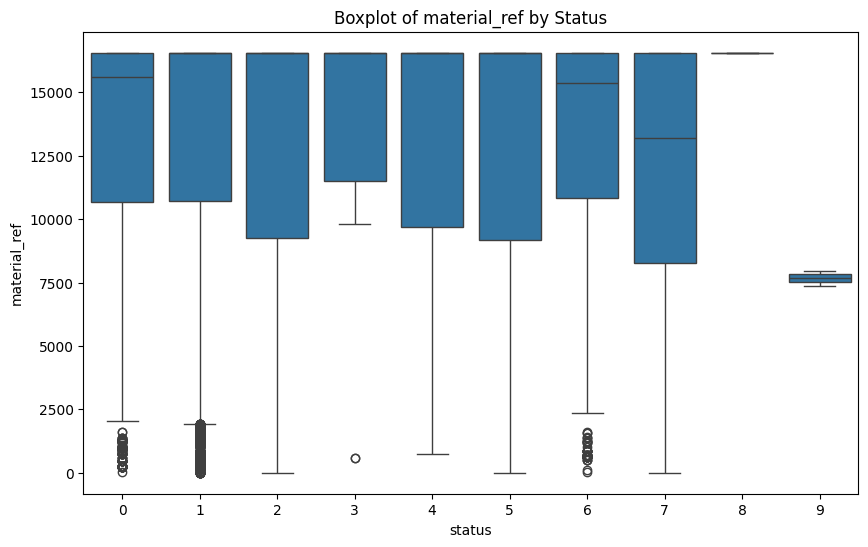

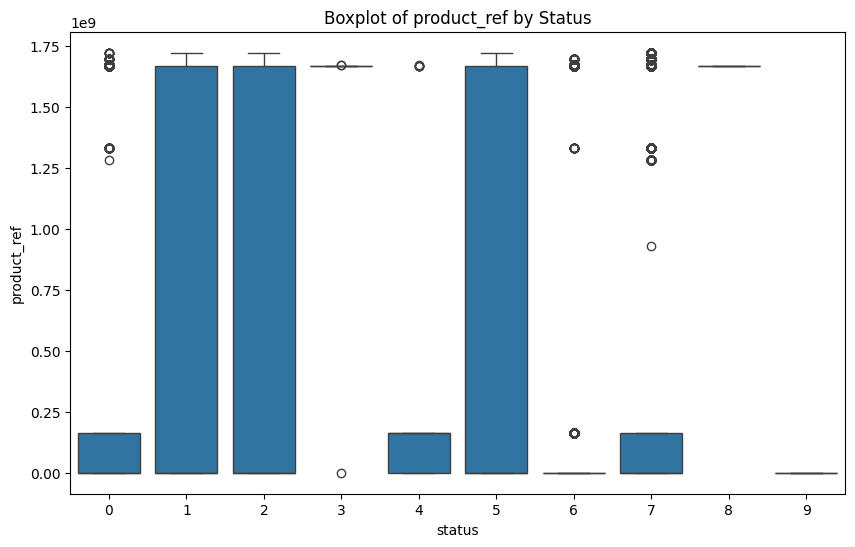

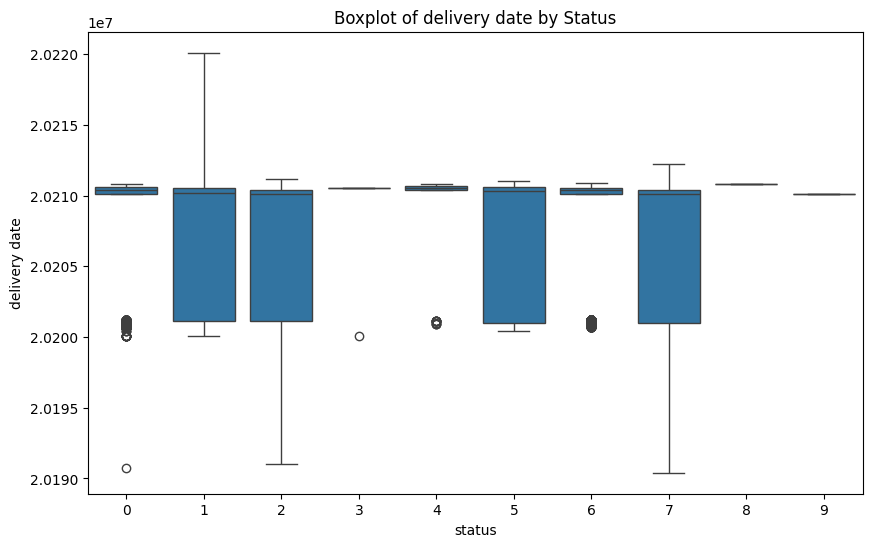

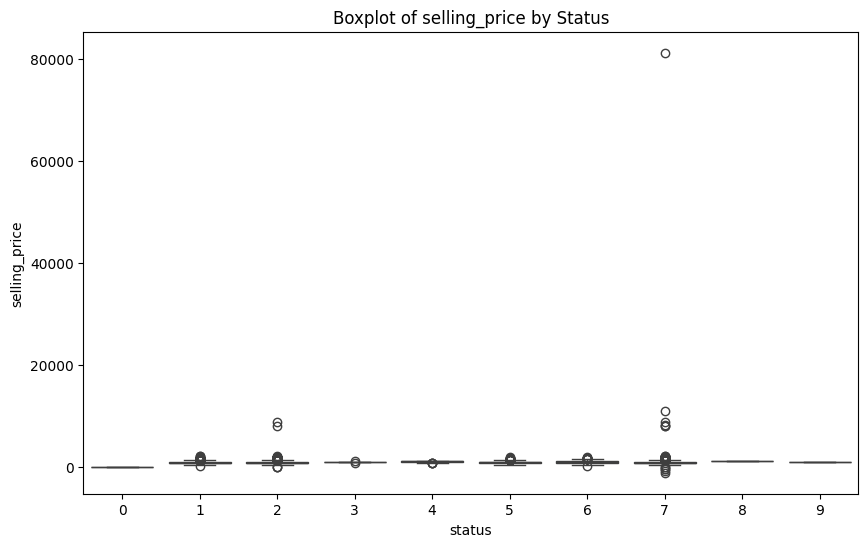

Significant features with correlation > 0.1:
 ['status', 'item type', 'application', 'selling_price', 'thickness', 'material_ref']


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed DataFrame
# df = pd.read_csv('Copper_Set.csv') # Assuming df is already loaded and preprocessed

# Display basic information and statistics
print(df.info())
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Distribution of the 'status' column
sns.countplot(x='status', data=df)
plt.title('Distribution of Status')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
print("Correlation Matrix:\n", corr_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlation with the 'status' column
status_corr = corr_matrix['status'].sort_values(ascending=False)
print("Correlation with Status:\n", status_corr)

# Boxplots to visualize distributions of numeric features by 'status'
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    if col != 'status':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='status', y=col, data=df)
        plt.title(f'Boxplot of {col} by Status')
        plt.show()

# Conclusion based on correlation analysis
significant_features = status_corr[abs(status_corr) > 0.1].index.tolist()
print("Significant features with correlation > 0.1:\n", significant_features)


In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming 'df' is your DataFrame and 'status' is the target column
X = df.drop('status', axis=1)  # Features
y = df['status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

# Calculate or set the value for balance_weights here
# For example, if you want to balance classes based on their frequency:
# balance_weights = [1, count(class_0) / count(class_1)]  # Adjust based on your data

# Create the XGBoost model
model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1) # Set a default value for now

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:32:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[  587     0     0     0     0     0     0     0     0]
 [    0  5381   241     0     0     3     7  1243     0]
 [    0   356  2666     0     0    11    17   801     0]
 [    0     0     0     1     0     0     0     1     0]
 [    0     8     0     0     9     0     0     0     0]
 [    0   119    45     0     0   277     3   348     0]
 [    1    36    32     0     1     1   614   124     0]
 [    1   679   380     0     0    31    11 21669     0]
 [    0     0     0     0     0     0     0     1     0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       0.82      0.78      0.80      6875
           2       0.79      0.69      0.74      3851
           3       1.00      0.50      0.67         2
           4       0.90      0.53      0.67        17
           5       0.86      0.35      0.50       792
           6       0.94      0.76      0.84       809
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import joblib  # Import joblib directly
from google.colab import files

# Use the correct variable name 'model' for the trained model
model_filename = "status_prediction_model.pkl"
joblib.dump(model, model_filename)  # Use joblib.dump to save the model
print(f"Saved status model as {model_filename}")

# Download the model file
files.download(model_filename)

Saved status model as status_prediction_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>